<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Енин А.В.

Оренбург

15.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)

Учим руки на примере

https://colab.research.google.com/drive/1AE_W9QOLoFrPsoihVqZtY5YMWtrPr80C

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image

# Подготовка данных для обучения сети

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

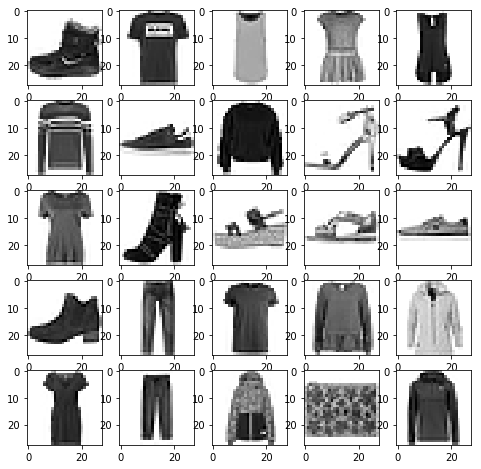

In [0]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap=plt.cm.gray_r)

In [0]:
inp_train = x_train/255
inp_test = x_test/255

# Создаем нейронную сеть

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Обучаем нейронную сеть

In [0]:
model.fit(inp_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5229 - acc: 0.8206
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3835 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3413 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3142 - acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2960 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2795 - acc: 0.8976
Epoch 7/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2646 - acc: 0.9028
Epoch 8/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2528 - acc: 0.9071
Epoch 9/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2441 - acc: 0.9099
Epoch 10/10
60000/60000 [==============================] - 1s 15us/sample - loss: 

# Сохраняем нейронную сеть для последующего использования

In [0]:
model.save('fash_mod.h5')

In [0]:
!ls -l

total 5932
-rw-r--r-- 1 root root 4911328 Aug 15 09:01 fash_mod.h5
drwxr-xr-x 1 root root    4096 Aug  2 16:06 sample_data
-rw-r--r-- 1 root root  662277 Aug 15 08:43 ботинок.jpg
-rw-r--r-- 1 root root  169772 Aug 15 08:22 пиджак.jpg
-rw-r--r-- 1 root root  156565 Aug 15 08:41 свитер.jpg
-rw-r--r-- 1 root root  157097 Aug 15 08:39 туфли.jpg


# Оценка качества обучения

In [0]:
model.evaluate(inp_test,y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3163 - acc: 0.8864


[0.31626689479351044, 0.8864]

# Используем сеть для распознавания предметов одежды

In [0]:
n=np.random.randint(len(inp_test))
n

5968

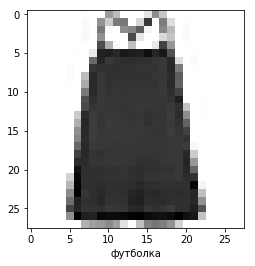

In [0]:
plt.imshow(x_test[n],cmap=plt.cm.gray_r)
plt.xlabel(classes[y_test[n]])
plt.show()

In [0]:
classes[ np.argmax( model.predict( inp_test[n:n+1])) ]

'платье'

# Загружаем свою картинку

In [0]:
!ls -l *.jpg

-rw-r--r-- 1 root root 662277 Aug 15 08:43 ботинок.jpg
-rw-r--r-- 1 root root 169772 Aug 15 08:22 пиджак.jpg
-rw-r--r-- 1 root root 156565 Aug 15 08:41 свитер.jpg
-rw-r--r-- 1 root root 157097 Aug 15 08:39 туфли.jpg


In [0]:
img = tf.keras.preprocessing.image.load_img("ботинок.jpg",target_size=(28,28),color_mode="grayscale")
img = tf.keras.preprocessing.image.img_to_array(img)
img = 255-img.reshape(28,28)

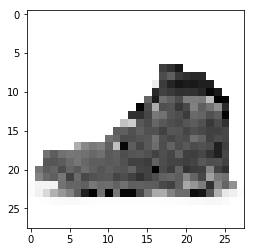

In [0]:
plt.imshow(img,cmap=plt.cm.gray_r)
plt.show()

In [0]:
classes[np.argmax( model.predict(img.reshape(1,28,28)/255.0))]

'ботинки'